In [1]:

from MPS_decomposition.hdf5_reader import Hdf5Reader
from MPS_decomposition.basic_decomposer import BasicDecomposer
from qiskit import QuantumCircuit, IBMQ
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')

In [15]:
mps = Hdf5Reader("new_5layers_7qubits.h5").get_adapter()
decomposer = BasicDecomposer(mps)
circuit1 = decomposer.decompose(barrier=True)

#circuit1.draw(output='mpl')

In [16]:
reversed_circuit1 = circuit1.inverse()

In [17]:
import qiskit.quantum_info as qi
import numpy as np

state_vector1 = qi.Statevector.from_instruction(reversed_circuit1)
vector_dot1 = np.vdot(state_vector1.data, mps.get_psi())
#print(state_vector1)
#print(mps.get_psi())
print("Scalar product (circuit 1): " , np.abs(vector_dot1))
#state_vector1.draw(output='latex')

Scalar product (circuit 1):  0.8761670717873455


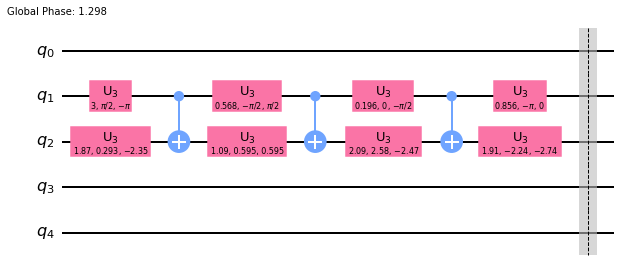

In [5]:
cir = decomposer._gate_list[2]

cir.draw(output='mpl')

In [6]:
import qiskit.quantum_info as qi
unitary = qi.Operator(cir)
print(unitary)

Operator([[-0.099369  +2.33146835e-15j,  0.        +0.00000000e+00j,
           -0.82293403+1.73472348e-16j, ...,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j, -0.099369  +2.33146835e-15j,
            0.        +0.00000000e+00j, ...,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.55532659-3.49720253e-15j,  0.        +0.00000000e+00j,
            0.4148371 -3.88578059e-16j, ...,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          ...,
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j, ...,  0.01341055-1.13797860e-15j,
            0.        +0.00000000e+00j,  0.92131722-4.30211422e-16j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j, ...,  0.        +0.00000

In [7]:
cir.qasm(formatted=False)

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[5];\nu3(2.9964852,pi/2,-pi) q[1];\nu3(1.8749012,0.29287314,-2.3526916) q[2];\ncx q[1],q[2];\nu3(0.56793122,-pi/2,pi/2) q[1];\nu3(1.0946508,0.59513649,0.59513649) q[2];\ncx q[1],q[2];\nu3(0.19550603,0,-pi/2) q[1];\nu3(2.0923904,2.5845785,-2.4668277) q[2];\ncx q[1],q[2];\nu3(0.8562847,-pi,0) q[1];\nu3(1.9147222,-2.2441343,-2.7416748) q[2];\nbarrier q[0],q[1],q[2],q[3],q[4];\n'

In [8]:
cir.qasm()
str1 = 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\nu3(1.3240541,pi/2,-pi) q[0];\nu3(2.1901707,-2.2548177,1.1287175) q[1];\ncx q[0],q[1];\nu3(2.2615056,-pi,-pi/2) q[0];\nu3(1.1242294,0.73185233,-2.5127476) q[1];\ncx q[0],q[1];\nu3(2.4606823,0,-1.0214052e-14) q[0];\nu3(1.9186488,0.80402245,0.34007341) q[1];\n'

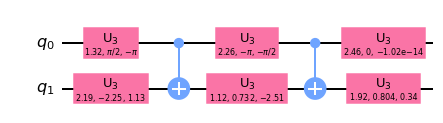

In [9]:
cir1= QuantumCircuit.from_qasm_str(str1)
cir1.draw(output='mpl')

In [10]:
cir1_mat = qi.Operator(cir1)
arr = cir1_mat.data
arr = np.matrix((arr*np.exp(-1j*2.26014282)))
print(arr)

[[ 0.37009589+7.27766181e-10j  0.5465778 +2.45740083e-08j
   0.69449268+8.97410701e-09j -0.28628946-1.15951730e-08j]
 [-0.80958409-3.81533005e-08j -0.05771504+1.11634289e-08j
   0.26152433+1.83220577e-08j -0.52234817-5.90433691e-09j]
 [ 0.19474007+1.73814979e-08j  0.33765295+2.24368646e-08j
  -0.64177232-1.89908001e-08j -0.66045067-1.68730505e-08j]
 [ 0.41192104+1.68835937e-08j -0.76414146-2.15067954e-08j
   0.19342502-5.22334787e-09j -0.45716043+8.05967543e-09j]]


In [11]:
print(arr[[0,2,1,3]])

[[ 0.37009589+7.27766181e-10j  0.5465778 +2.45740083e-08j
   0.69449268+8.97410701e-09j -0.28628946-1.15951730e-08j]
 [ 0.19474007+1.73814979e-08j  0.33765295+2.24368646e-08j
  -0.64177232-1.89908001e-08j -0.66045067-1.68730505e-08j]
 [-0.80958409-3.81533005e-08j -0.05771504+1.11634289e-08j
   0.26152433+1.83220577e-08j -0.52234817-5.90433691e-09j]
 [ 0.41192104+1.68835937e-08j -0.76414146-2.15067954e-08j
   0.19342502-5.22334787e-09j -0.45716043+8.05967543e-09j]]
